In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from sklearn import preprocessing

In [2]:
data = pd.read_csv("Beijing.csv", index_col = 0)
data.head()

,Lng,Lat,tradeTime,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,Price_Level_Per_Square_Meter
0,116.475489,40.019520,8/9/16,106,415.0,31680,131.00,2,1,1,...,1,2005,3,6,0.217,1,0,1,7,3
1,116.453917,39.881534,7/28/16,126,575.0,43436,132.38,2,2,1,...,1,2004,4,6,0.667,1,1,0,7,4
2,116.561978,39.877145,12/11/16,48,1030.0,52021,198.00,3,2,1,...,4,2005,3,6,0.500,1,0,0,7,5
3,116.438010,40.076114,9/30/16,138,297.5,22202,134.00,3,1,1,...,1,2008,1,6,0.273,1,0,0,6,2
4,116.428392,39.886229,8/28/16,286,392.0,48396,81.00,2,1,1,...,4,1960,2,2,0.333,0,1,1,1,4


In [3]:
droprows = []
for i in range(data.shape[0]):
    if not data["constructionTime"][i].isnumeric():
        droprows.append(i)
data = data.drop(droprows, axis = 0)

data["constructionTime"] = data['constructionTime'].astype('int64')
data["UnitPrice"] = data["Price_Level_Per_Square_Meter"]
print(data.shape)

(9740, 22)


In [4]:
data.head()

,Lng,Lat,tradeTime,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,...,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,Price_Level_Per_Square_Meter,UnitPrice
0,116.475489,40.019520,8/9/16,106,415.0,31680,131.00,2,1,1,...,2005,3,6,0.217,1,0,1,7,3,3
1,116.453917,39.881534,7/28/16,126,575.0,43436,132.38,2,2,1,...,2004,4,6,0.667,1,1,0,7,4,4
2,116.561978,39.877145,12/11/16,48,1030.0,52021,198.00,3,2,1,...,2005,3,6,0.500,1,0,0,7,5,5
3,116.438010,40.076114,9/30/16,138,297.5,22202,134.00,3,1,1,...,2008,1,6,0.273,1,0,0,6,2,2
4,116.428392,39.886229,8/28/16,286,392.0,48396,81.00,2,1,1,...,1960,2,2,0.333,0,1,1,1,4,4


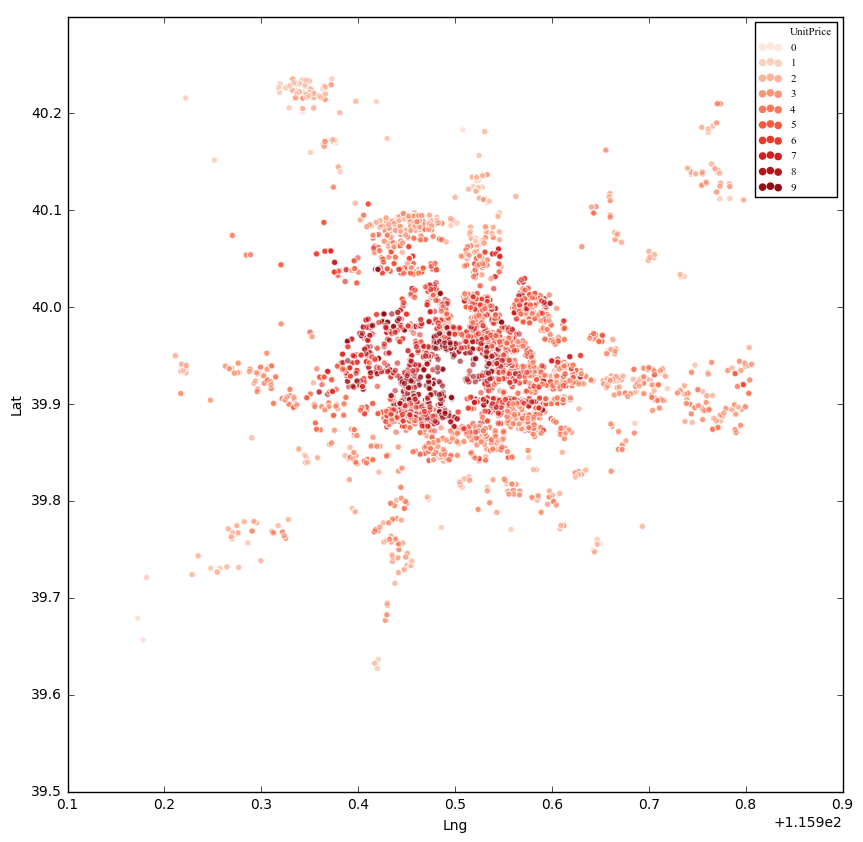

In [5]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="Lng", y="Lat", hue="UnitPrice", palette=sns.color_palette("Reds", n_colors=10), data=data, legend="brief", alpha=0.6)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.show()

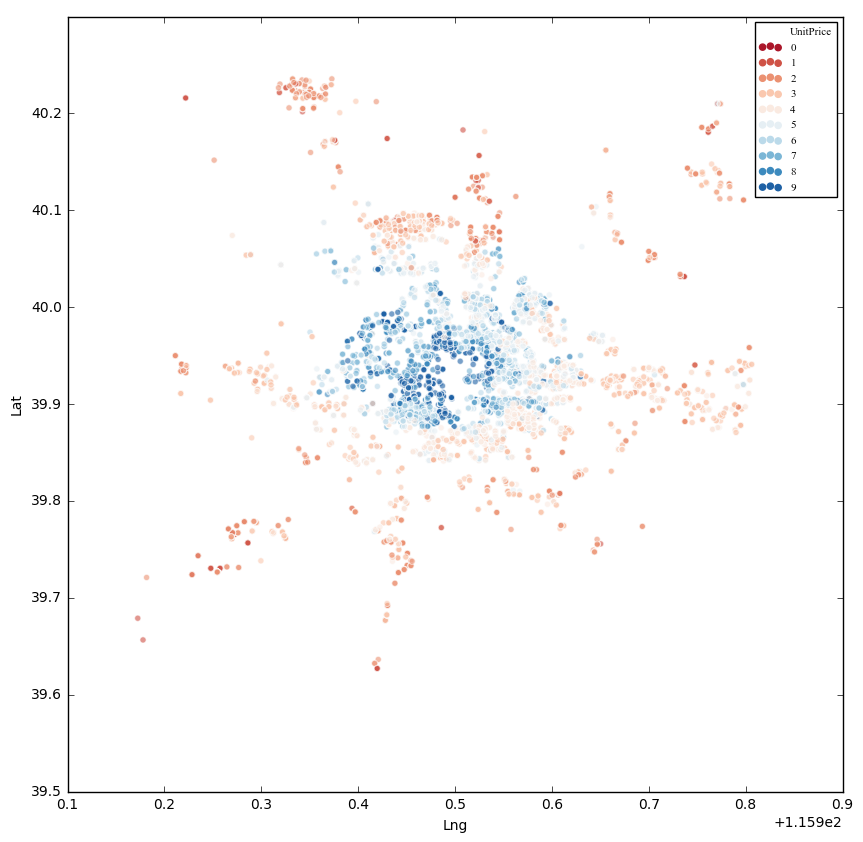

In [6]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="Lng", y="Lat", hue="UnitPrice", palette=sns.color_palette("RdBu", n_colors=10), data=data, legend="brief", alpha=0.6)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.show()

In [7]:
feature = ["Lng", "Lat", "followers", "square","livingRoom", "drawingRoom", "kitchen", 
           "bathRoom", "buildingType", "constructionTime", "renovationCondition", "buildingStructure", 
           "elevator", "fiveYearsProperty", "subway", "district"]
data_X = data[feature]
data_y = data["Price_Level_Per_Square_Meter"]

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data_X, data_y, test_size=0.25, random_state=61)
plotdata = X_test.copy()
print(X_train.shape)
print(X_test.shape)

(7305, 16)
(2435, 16)


In [23]:
y_test[4739]

4

In [9]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=120)
clf.fit(X_train, y_train)
predict = clf.predict(X_test)
print(feature)
print(clf.feature_importances_)
print(clf.score(X_test, y_test))

['Lng', 'Lat', 'followers', 'square', 'livingRoom', 'drawingRoom', 'kitchen', 'bathRoom', 'buildingType', 'constructionTime', 'renovationCondition', 'buildingStructure', 'elevator', 'fiveYearsProperty', 'subway', 'district']
[ 0.17982165  0.18475436  0.11521244  0.13443654  0.03473469  0.0232192
  0.0027392   0.01622207  0.0270953   0.10083222  0.03262794  0.01611381
  0.01171458  0.02263005  0.01733006  0.08051591]
0.589733059548


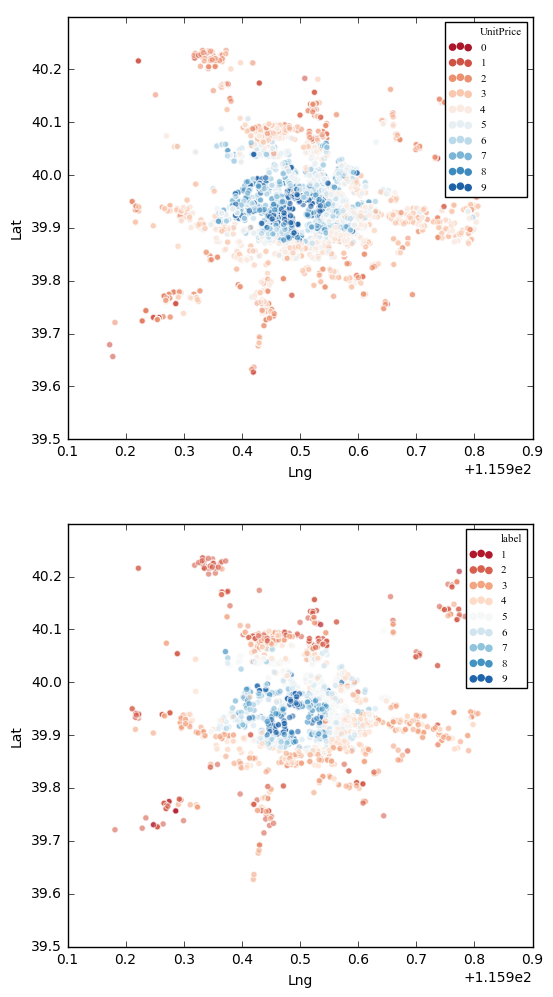

In [10]:
plt.figure(figsize=(6,12))
plotdata["label"] = predict
plt.subplot(2,1,1)
sns.scatterplot(x="Lng", y="Lat", hue="UnitPrice", palette=sns.color_palette("RdBu", n_colors=10), data=data, legend="brief", alpha=0.6)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.subplot(2,1,2)
sns.scatterplot(x="Lng", y="Lat", hue="label", palette=sns.color_palette("RdBu", n_colors=9), data=plotdata, legend="brief", alpha=0.6)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.show()

In [11]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=150, learning_rate=0.2, max_depth=5)
clf.fit(X_train, y_train)
predict = clf.predict(X_test)
print(feature)
print(clf.feature_importances_)
print(clf.score(X_test, y_test))

['Lng', 'Lat', 'followers', 'square', 'livingRoom', 'drawingRoom', 'kitchen', 'bathRoom', 'buildingType', 'constructionTime', 'renovationCondition', 'buildingStructure', 'elevator', 'fiveYearsProperty', 'subway', 'district']
[ 0.16194754  0.18127003  0.13118866  0.22641674  0.0202285   0.06815182
  0.00325342  0.01490332  0.01663117  0.07202451  0.02216906  0.01518331
  0.00971901  0.01292651  0.00910202  0.03488438]
0.590554414784


In [12]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
predict = clf.predict(X_test)
print(feature)
print(clf.feature_importances_)
print(clf.score(X_test, y_test))

['Lng', 'Lat', 'followers', 'square', 'livingRoom', 'drawingRoom', 'kitchen', 'bathRoom', 'buildingType', 'constructionTime', 'renovationCondition', 'buildingStructure', 'elevator', 'fiveYearsProperty', 'subway', 'district']
[ 0.1786522   0.23485911  0.12895709  0.15702425  0.02944646  0.01810557
  0.00200946  0.00677072  0.02127075  0.09599512  0.02720476  0.00821561
  0.00687097  0.01860886  0.01134224  0.05466681]
0.525256673511


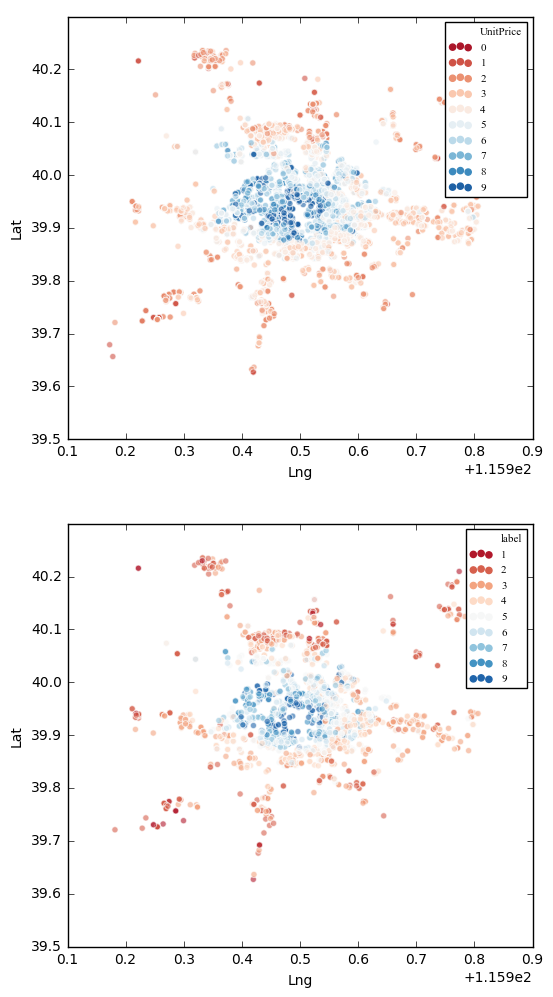

In [13]:
plt.figure(figsize=(6,12))
plotdata["label"] = predict
plt.subplot(2,1,1)
sns.scatterplot(x="Lng", y="Lat", hue="UnitPrice", palette=sns.color_palette("RdBu", n_colors=10), data=data, legend="brief", alpha=0.6)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.subplot(2,1,2)
sns.scatterplot(x="Lng", y="Lat", hue="label", palette=sns.color_palette("RdBu", n_colors=9), data=plotdata, legend="brief", alpha=0.6)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.show()

In [14]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3, weights='uniform')
clf.fit(X_train, y_train)
predict = clf.predict(X_test)
print(clf.score(X_test, y_test))

0.227515400411


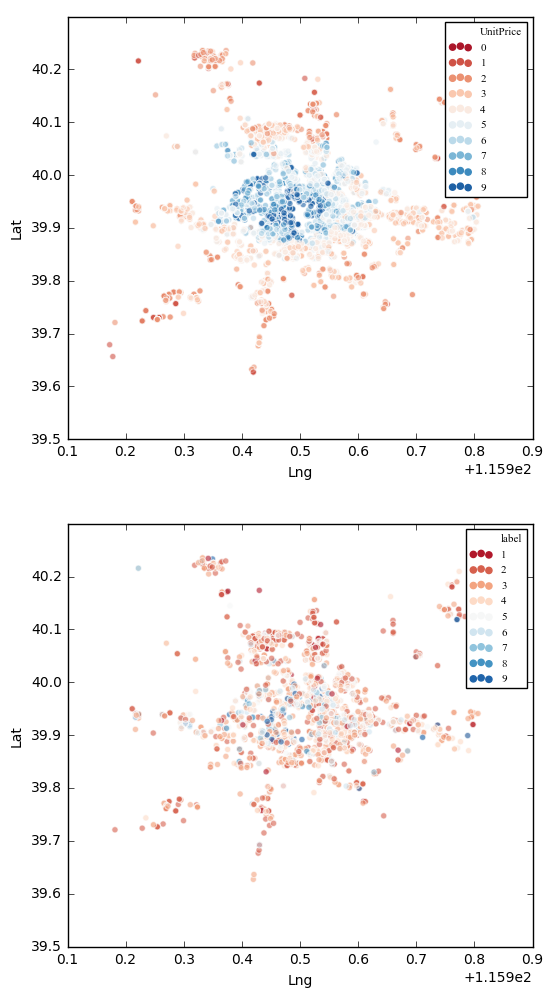

In [15]:
plt.figure(figsize=(6,12))
plotdata["label"] = predict
plt.subplot(2,1,1)
sns.scatterplot(x="Lng", y="Lat", hue="UnitPrice", palette=sns.color_palette("RdBu", n_colors=10), data=data, legend="brief", alpha=0.6)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.subplot(2,1,2)
sns.scatterplot(x="Lng", y="Lat", hue="label", palette=sns.color_palette("RdBu", n_colors=9), data=plotdata, legend="brief", alpha=0.6)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.show()

In [16]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)
predict = clf.predict(X_test)
print(feature)
print(clf.score(X_test, y_test))

['Lng', 'Lat', 'followers', 'square', 'livingRoom', 'drawingRoom', 'kitchen', 'bathRoom', 'buildingType', 'constructionTime', 'renovationCondition', 'buildingStructure', 'elevator', 'fiveYearsProperty', 'subway', 'district']
0.245585215606


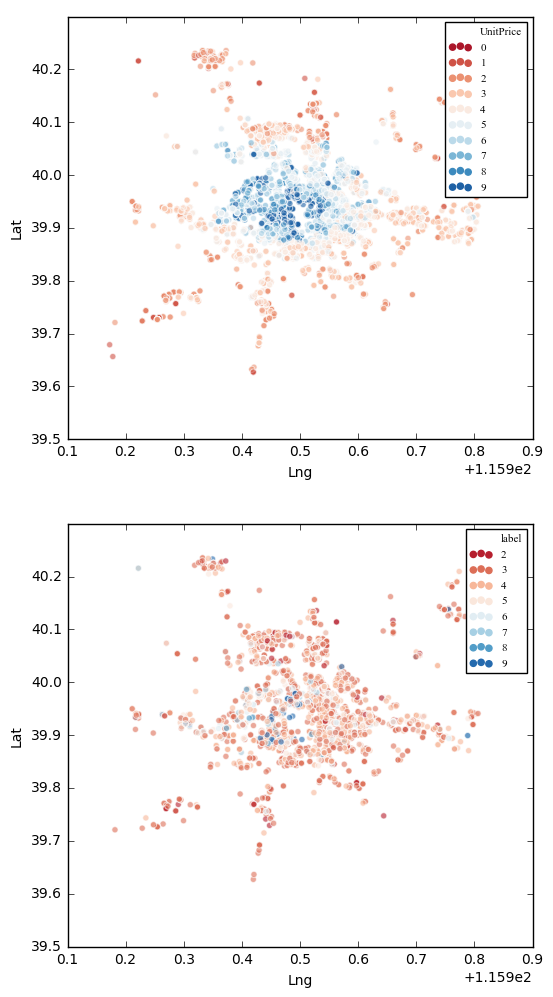

In [17]:
plt.figure(figsize=(6,12))
plotdata["label"] = predict
plt.subplot(2,1,1)
sns.scatterplot(x="Lng", y="Lat", hue="UnitPrice", palette=sns.color_palette("RdBu", n_colors=10), data=data, legend="brief", alpha=0.6)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.subplot(2,1,2)
sns.scatterplot(x="Lng", y="Lat", hue="label", palette=sns.color_palette("RdBu", n_colors=8), data=plotdata, legend="brief", alpha=0.6)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.show()

In [18]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
predict = clf.predict(X_test)
print(feature)
print(clf.score(X_test, y_test))

['Lng', 'Lat', 'followers', 'square', 'livingRoom', 'drawingRoom', 'kitchen', 'bathRoom', 'buildingType', 'constructionTime', 'renovationCondition', 'buildingStructure', 'elevator', 'fiveYearsProperty', 'subway', 'district']
0.328542094456


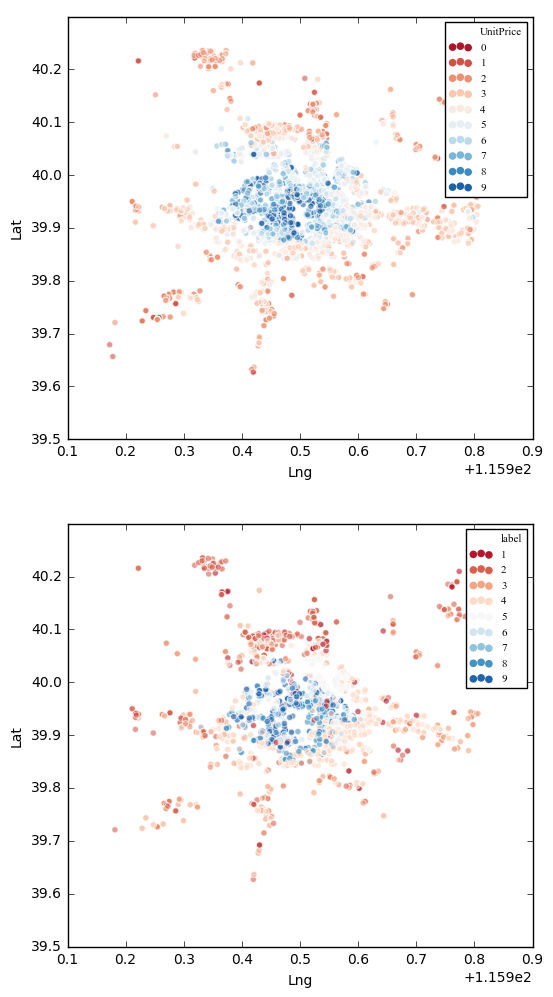

In [19]:
plt.figure(figsize=(6,12))
plotdata["label"] = predict
plt.subplot(2,1,1)
sns.scatterplot(x="Lng", y="Lat", hue="UnitPrice", palette=sns.color_palette("RdBu", n_colors=10), data=data, legend="brief", alpha=0.6)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.subplot(2,1,2)
sns.scatterplot(x="Lng", y="Lat", hue="label", palette=sns.color_palette("RdBu", n_colors=9), data=plotdata, legend="brief", alpha=0.6)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.show()